# Modelo de Análise Diagnóstica de Custos Logísticos

#### # Importando módulos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Parte I: Baixando dados tratados no Excel

In [14]:
dados_1 = pd.read_excel('dados/custos_logisticos.xlsx')

dados_1

,itens,R$ em milhares em 20X1,% do total em 20X1,R$ em milhares em 20X2,% do total em 20X2
0,venda líquida anual,547000.0,100.0000,570000.0,100.000000
1,NaN,NaN,NaN,NaN,NaN
2,custo logístico de abastecimento,33750.0,0.0617,35577.0,0.062416
3,NaN,NaN,NaN,NaN,NaN
4,suprimentos,1738.0,0.0031,1945.0,0.003412
5,frete/seguro,6744.0,0.0123,7100.0,0.012456
6,logística internacional,355.0,0.0006,422.0,0.000740
7,gastos com importação,14004.0,0.0256,14500.0,0.025439
8,planejamento de materiais,2689.0,0.0049,3000.0,0.005263
9,administração de materiais,3686.0,0.0067,3790.0,0.006649


In [15]:
dados_2 = pd.read_excel('dados/evolucao_percentual.xlsx')

dados_2

,itens,R$ em milhares em 20X1,variação % em 20X1,R$ em milhares em 20X2,número-índice,variação % em 20X2
0,venda líquida anual,547000.0,100.0,570000.0,1.042048,0.042048
1,NaN,NaN,NaN,NaN,NaN,NaN
2,custo logístico de abastecimento,33750.0,100.0,35577.0,1.054133,0.054133
3,NaN,NaN,NaN,NaN,NaN,NaN
4,suprimentos,1738.0,100.0,1945.0,1.119102,0.119102
5,frete/seguro,6744.0,100.0,7100.0,1.052788,0.052788
6,logística internacional,355.0,100.0,422.0,1.188732,0.188732
7,gastos com importação,14004.0,100.0,14500.0,1.035418,0.035418
8,planejamento de materiais,2689.0,100.0,3000.0,1.115656,0.115656
9,administração de materiais,3686.0,100.0,3790.0,1.028215,0.028215


In [16]:
data = {'2021': [dados_1['R$ em milhares em 20X1'][0], dados_2['R$ em milhares em 20X1'][31]],
        '2022': [dados_1['R$ em milhares em 20X2'][0], dados_2['R$ em milhares em 20X2'][31]],}

index = ['Vendas', 'Custo Logístico']

vendas = pd.DataFrame(data, index = index)

In [17]:
vendas

,2021,2022
Vendas,547000.0,570000.0
Custo Logístico,65447.0,68772.0


## Parte II: Preparando e Modelando Dados 

In [18]:
fator_de_crescimento_venda = dados_2['número-índice'][0]
fator_de_crescimento_venda

1.0420475319926874

In [19]:
fator_de_crescimento_custo = dados_2['número-índice'][31]
fator_de_crescimento_custo

1.050804467737253

##### # Criando lista de venda com crescimento logarítmico 

In [20]:
valor_inicial_venda = np.array([vendas['2021'][0]])

x = valor_inicial_venda
y = np.linspace(1, 50, 50)
z = np.log(fator_de_crescimento_venda)

lista_logaritmica_venda = x * np.log(y) + z

lista_logaritmica_venda

C:\Users\User\AppData\Local\Temp\ipykernel_17804\2367219586.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_inicial_venda = np.array([vendas['2021'][0]])


array([4.11875584e-02, 3.79151549e+05, 6.00940963e+05, 7.58303057e+05,
       8.80362579e+05, 9.80092471e+05, 1.06441289e+06, 1.13745456e+06,
       1.20188188e+06, 1.25951409e+06, 1.31164876e+06, 1.35924398e+06,
       1.40302734e+06, 1.44356440e+06, 1.48130350e+06, 1.51660607e+06,
       1.54976774e+06, 1.58103339e+06, 1.61060816e+06, 1.63866559e+06,
       1.66535381e+06, 1.69080026e+06, 1.71511538e+06, 1.73839549e+06,
       1.76072512e+06, 1.78217885e+06, 1.80282281e+06, 1.82271591e+06,
       1.84191086e+06, 1.86045501e+06, 1.87839104e+06, 1.89575758e+06,
       1.91258968e+06, 1.92891925e+06, 1.94477543e+06, 1.96018490e+06,
       1.97517214e+06, 1.98975967e+06, 2.00396826e+06, 2.01781710e+06,
       2.03132396e+06, 2.04450532e+06, 2.05737650e+06, 2.06995177e+06,
       2.08224442e+06, 2.09426689e+06, 2.10603078e+06, 2.11754699e+06,
       2.12882574e+06, 2.13987663e+06])

##### # Criando lista de custos com crescimento exponencial 

In [21]:
valor_inicial_custo = np.array([vendas['2021'][1]])

num_elementos = 50
lista_exponencial_custo = np.power(fator_de_crescimento_custo, np.arange(num_elementos)) * valor_inicial_custo

lista_exponencial_custo

C:\Users\User\AppData\Local\Temp\ipykernel_17804\1795858946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_inicial_custo = np.array([vendas['2021'][1]])


array([ 65447.        ,  68772.        ,  72265.92485523,  75937.35670304,
        79795.31369171,  83849.27213174,  88109.18977255,  92585.53026171,
        97289.28884682, 102232.01938322, 107425.86271369, 112883.57649008,
       118618.56650993, 124644.91964523, 130977.43844395, 137631.67748969,
       144623.98160834, 151971.52601599, 159692.35850645, 167805.44378208,
       176330.71003684, 185289.09790599, 194702.61190262, 204594.37446739,
       214988.68276424, 225911.06836161, 237388.35994568, 249448.74921974,
       262121.86015157, 275438.82173887, 289432.34447149, 304136.80067831,
       319588.30895608, 335824.82288764, 352886.2242674 , 370814.42106312,
       389653.45035453, 409449.58650177, 430251.45480923, 452110.150964  ,
       475079.36654233, 499215.52089247, 524577.89971758, 551228.80069946,
       579233.68652044, 608661.3456596 , 639584.06135808, 672077.7891686 ,
       706222.34352534, 742101.5937923 ])

In [22]:
diferenca_custo_venda = lista_logaritmica_venda - lista_exponencial_custo
diferenca_custo_venda.max()
index = np.where(diferenca_custo_venda == diferenca_custo_venda.max())[0][0]
index

33

In [23]:
diferenca_custo_venda = lista_logaritmica_venda - lista_exponencial_custo
diferenca_custo_venda

array([ -65446.95881244,  310379.54895385,  528675.03823379,
        682365.7000171 ,  800567.2655973 ,  896243.19872356,
        976303.70294826, 1044869.03422472, 1104592.59614365,
       1157282.06767208, 1204222.89269457, 1246360.40213152,
       1284408.77320909, 1318919.48084188, 1350326.06274651,
       1378974.39476303, 1405143.75877797, 1429061.86674077,
       1450915.80428515, 1470860.15103951, 1489023.10458543,
       1505511.16526856, 1520412.76539818, 1533801.1119205 ,
       1545736.43462622, 1556267.7791237 , 1565434.44694625,
       1573267.15903366, 1579789.00003859, 1585016.18721789,
       1588958.69756945, 1591620.7793407 , 1593001.36835364,
       1593094.42526496, 1591889.20655486, 1589370.47945993,
       1585518.68904942, 1580310.08405612, 1573716.80681124,
       1565706.95162388, 1556244.59513248, 1545289.80149609,
       1532798.60475435, 1518722.97024139, 1503010.73657148,
       1485605.53940749, 1466446.71796488, 1445469.20498557,
       1422603.40072873,

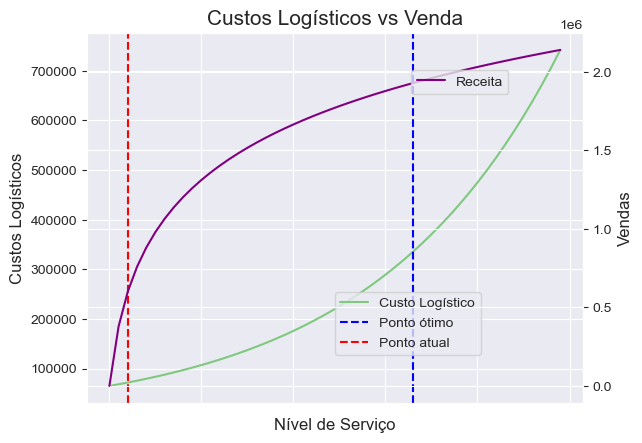

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

fig, ax1 = plt.subplots()

ax1.plot(lista_exponencial_custo, label='Custo Logístico')

ax1.set_xlabel('Nível de Serviço', fontsize=12)
ax1.set_ylabel('Custos Logísticos', fontsize=12)
ax1.set_title('Custos Logísticos vs Venda', fontsize=15)
ax1.set_xticklabels([])

ax2 = ax1.twinx()

ax2.plot(lista_logaritmica_venda, color='purple', label='Receita')

ax2.set_ylabel('Vendas', fontsize=12)

ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

ax1.axvline(x=index, color='blue', linestyle='--', label='Ponto ótimo')

ax1.axvline(x=2, color='red', linestyle='--', label='Ponto atual')

ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 0.3), borderaxespad=0.)
ax2.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9), borderaxespad=0.)

plt.show()

## Parte III: Conclusão

    A logística de abastecimento é o trajeto inicial da nossa cadeia de suprimento responsável por abastecer a nossa Indústria dos bens necessários para a nossa produção, indo de matérias primas até máquinas novas. E por esse motivo, é necessário que seja bem diligenciada para que não haja interrupções na produção, o que poderia acarretar grandes perdas de capital. Por isso é natural, dependendo da indústria, que em ambos os anos os custos dessa parte da logística sejam os mais expressivos, uma vez que para a produção de uma única peça, o fornecimento dos insumos necessários pode vir de diversos fornecedores pelo mundo(seguindo um modelo de produção explosivo), gerando custos de frete  internacional e nacional até a planta, as armazenagens ocorridas pelo caminho e outros custos relacionados ao desembaraço aduaneiro (honorários, impostos, AFRMM e etc), além do próprio custo das mercadorias importadas em si, muitas vezes negociadas em USD e Euro. O aumento de custo total dessa área de 6,17% para 6,24% pode estar associado a muitos fatores, incluindo variações cambiais.

    Já em relação a logística de planta, os custos tendem a ser menores mesmo, uma vez que a movimentação de insumos e produtos tendem a ocorrer apenas no espaço restrito da planta de produção. A maior preocupação nesse momento deve ser de manter um nível de estoque otimizado e um bom programa de produção para que não haja movimentação e estoque imobilizado em excesso (ou em falta). Aqui é onde a nossa cadeia de suprimentos se afunila. Então, mesmo que os custos sejam menores, é necessário grande atenção para que não haja um rompimento do processo, o que poderia afetar o abastecimento e a distribuição.

    O aumento de custo total dessa área de 0,64% para 0,68% pode estar associado a muito fatores, como um maior investimento ou má gerenciamento dos processos.
    
    Por fim, na logística de distribuição, os custos estão voltados à entrega da mercadoria produzida aos nossos clientes, incluindo clientes no exterior, por meio de exportações. E em termos de custo, temos custos menores, pois não é incomum que o importador estrangeiro arque com a maior parte dos custos logísticos para o seu abastecimento, da mesma forma que arcamos os nossos custos de importação. Além disso, a carga tributária no Brasil sobre processos de exportação é significativamente menor do que nos processos de importação.

    Houve uma redução dos custos 5,15% a 5,14%, o que pode estar associado a uma necessidade de redução dos custos para compensar o aumento das outras áreas e/ou aumentar o nível de serviço, o que pode estar gerando o aumento da venda líquida para 570.000,00.
    
    Feitas a análises individuais anteriores, podemos observar que na nossa indústria os custos logísticos em ambos os anos parecem coerentes com o que se esperaria, tendo pequenos aumentos percentuais de um para outro, com uma certa redução dos custos relativos da logística de distribuição o que pode estar levando a uma venda líquida maior, mas que ainda não compensa o aumento dos custos logísticos % totais.
   
    Mas essas nuances percentuais examinaremos melhor na seção seguinte.

    A logística de abastecimento não teve um aumento tão significativo. Os custos que tiveram um maior aumento percentual, não são de grande impacto dos custos totais, como suprimentos, recebimento e planejamento, portanto não há grande necessidade de análise, apenas de monitoramento, uma vez que essas mudanças podem ocorrer devido a oscilações cambiais. Mas como houve um aumento expressivo de 19% de logística internacional e 5% de frete internacional (1,25% do total) e gastos com importação (2,54% total), talvez seja melhor verificar cotações de custos com outros agentes de carga e despachantes.
    
    Em relação à logística de planta, podemos observar que houve um aumento expressivo de 10% causados por aumentos em todas as suas áreas. Então mesmo que não seja muito representativo nos custos totais, pode valer a pena melhorar a forma de gestão e trabalhar com outros métodos de produção, mas sobretudo em relação aos custos de estocagem.
    
    Diferente dos outros custos, esse foi o único que teve uma redução em relação aos custos totais, então não há grande necessidade atenção. Talvez apenas monitorar os custos de frete, buscando alternativas e rotas mais baratas.
    
    Mas os custos de maior impacto (frete sobre vendas e armazenagem e expedição) tiveram aumento de apenas 1%. Então talvez o modelo de gestão desses processos deva servir de exemplo para os outros.
    
    No fim, podemos observar que os custos logísticos totais subiram 5%, enquanto as vendas líquidas subiram 4%. Dessa forma, seria necessário trabalhar nos pontos anteriores, sobretudo, na área de logística de suprimento e de planta para que haja uma redução desses custos, mas sem perder o nível de serviço de vista, e buscando colocar um benchmarking com o objetivo de reduzir os custos logísticos em, no máximo, 10% do total, idealmente, por exemplo.
    
    Dessa forma com a continuação do crescimento poderemos nos aproximar do ponto ótimo, onde será possível obter o maior nível de serviço e receita pelo menor custo logístico possível, como pode ser visto pelo modelo estimado anteriormente.